# Manipulation de la librairie networkx

## Construction de réseaux d'interactions à partir de données MITAB.

Le format (MITAB) stocke des paires de protéines en interaction. Dans ce format, chaque colonne porte une information spécifique.
Une description du format est disponible [ici](https://psicquic.github.io/MITAB27Format.html).
Les données d'interactions impliquant les protéines surreprésentées de l'expérience ont été obtenues depuis la base de données [Intact](https://www.ebi.ac.uk/intact/home).
Ces données sont mises à votre disposition dans le fichier `data/proteins.mitab`.

Vous extrairez du fichier les paires d'identifiants uniprot des protéines en interaction.

Ces paires de protéines constituent un réseau d'interaction protéine-protéine que vous allez dessiner à l'aide de la libraire [networkx](https://networkx.org/documentation/stable/reference).
Le code suivant vous est fourni à titre d'exemple.

```python
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
G = nx.Graph()

fig, ax = plt.subplots(figsize=(8, 8))

G.add_edge('a', 'b')
G.add_edge('e', 'b')
G.add_edge('e', 'a')
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color=['blue','blue','red'] , node_size=2000)
```


Les positions des noeuds sont paramétrables au travers de l'objet [layout](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.spring_layout.html). Une fois une première représentation du réseau obtenue, affinez celle-ci afin de:

* Écrire les identifiants uniprot dans les noeuds du réseau.
* Faire du diamètre des noeuds une fonction du nombre de partenaires protéiques.
* Faire de la largeur des arêtes une fonction du nombre d'experiences (lignes MITAB) detectant cette interaction
* Colorier les arêtes soutenues par au moins une interaction de type physique entre proteines.
* Utiliser une color map quantitative et divergente pour colorier les arêtes en fonction du nombre d'experiences (lignes MITAB) detectant cette interaction

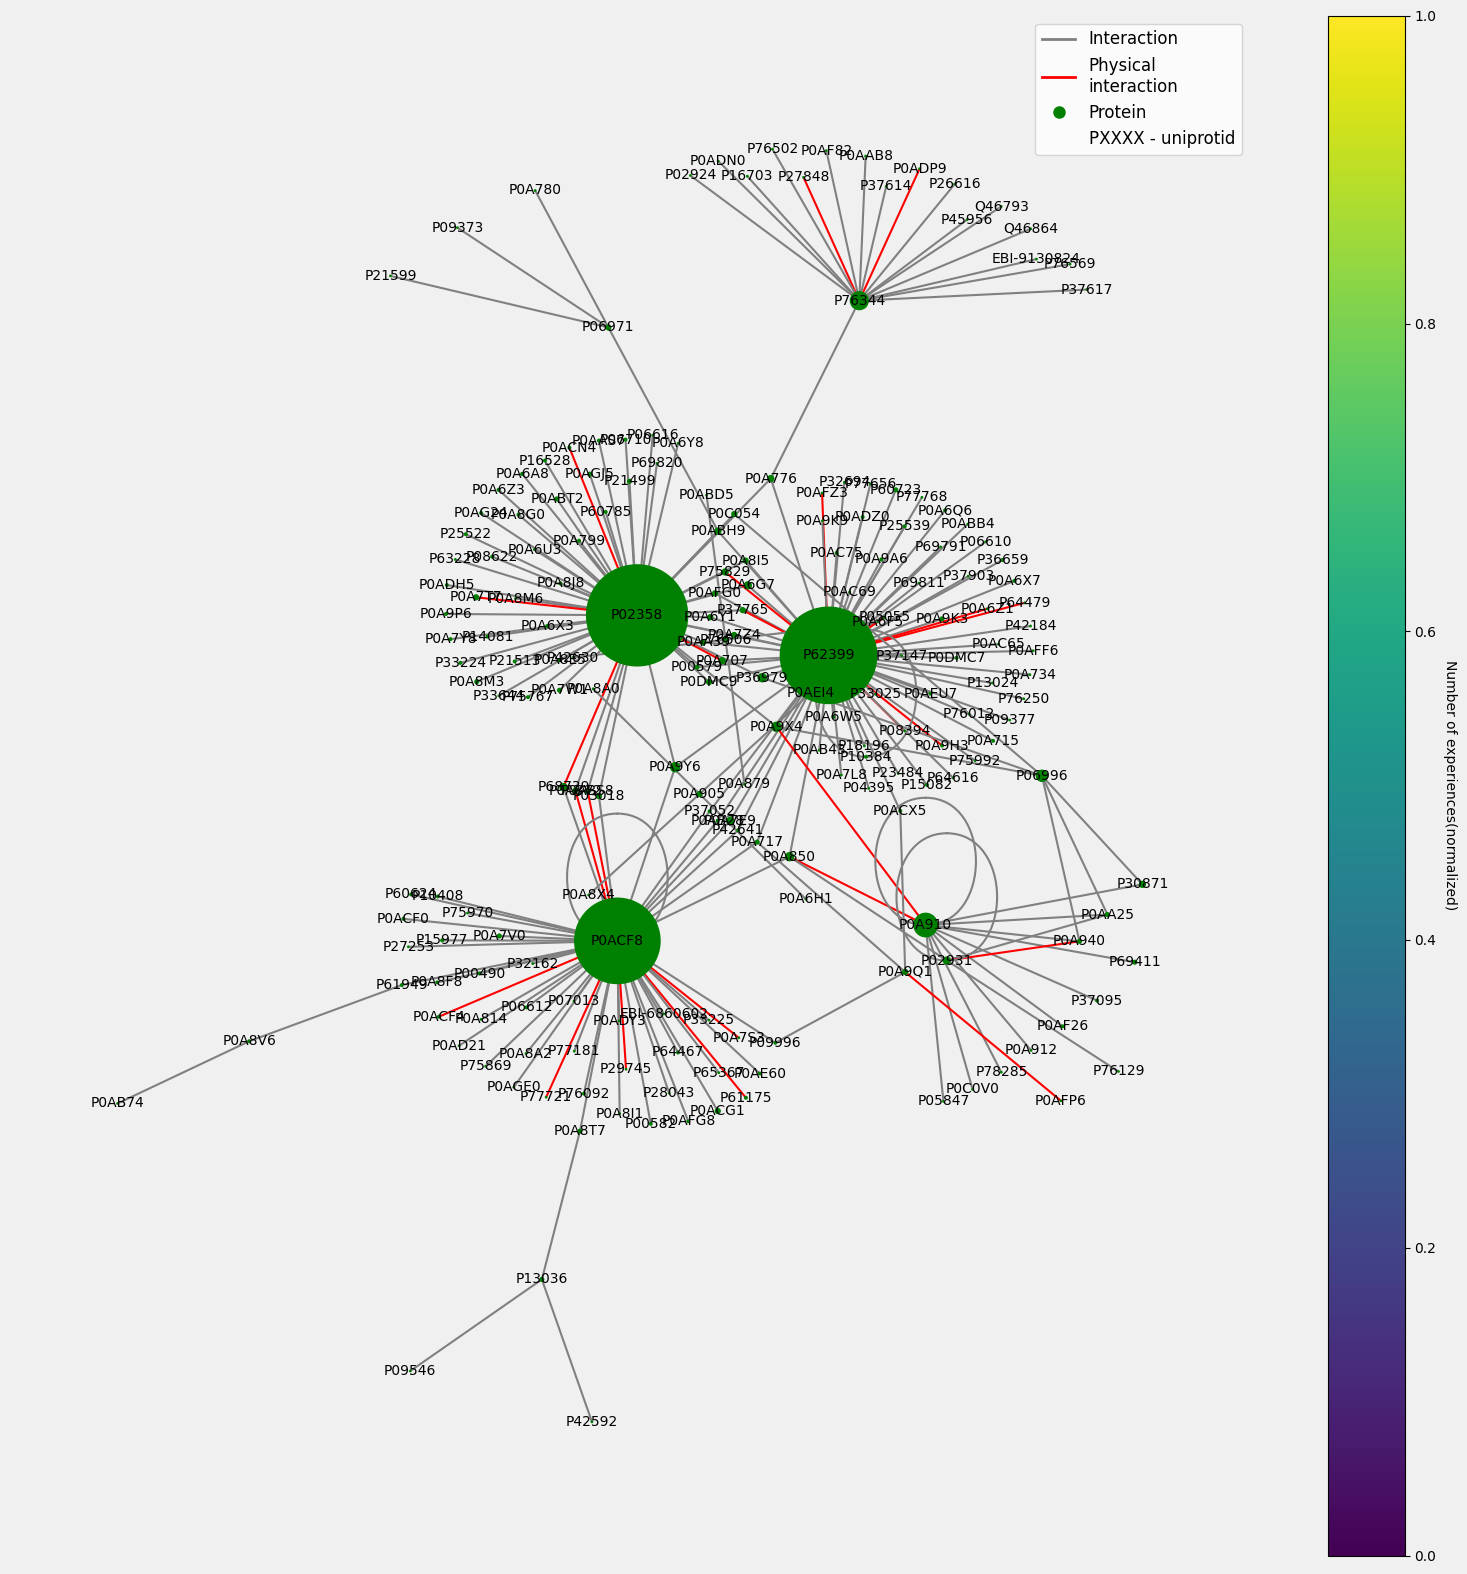

In [150]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.colors import LogNorm
from matplotlib.lines import Line2D

int  = []       #
count = {}      #   dico qui contien le nombre d'occurences
G = nx.Graph()  #   objet a partir duquel tu crées ton graph avec les valeurs de  la liste int

type = {}       #   un dico qui permet de compter le nombre d'interactions physiques par prot (pas implementé, mais il est bon)
colo = []       #   liste des couleurs avec red pour les interactions physiques et gray pour les autres
with open('/home/cheburek/Desktop/jupyter_serie/data/proteins.mitab', 'r') as file:
    for line in file:
       
        parts = line.strip().split('\t')
        ty = parts[11]
        
        id1 = parts[0].split(':')[1]
        id2 = parts[1].split(':')[1]
        int.append((id1,id2))           
        if id1 not in type.keys():
            type[id1] = 0
        if id2 not in type.keys():
            type[id2] = 0
        if '(physical association)' in ty.split("\""):
            type[id1] = type.get(id2, 0) +1
            type[id2] = type.get(id2, 0) +1
            colo.append("red")
        else:
            colo.append("gray")
# jusqu'a la tu a 2 vecteurs, int et colo, avec les proteines en interaction et la couleur en fonction d'interaction associée

for i in int:
    prot1, prot2 = i
    count[prot1] = count.get(prot1, 0) + 1
    count[prot2] = count.get(prot2, 0) + 1
    G.add_edge(prot1,prot2)

#  ici j'ai créé ton G et conté le nombre d'interactions dont chaque prot fait partie


fig, ax = plt.subplots(figsize=(20,20))   #afffichage
size = []

for s in count:
    size.append(count[s] **1.8)                   # ca c'est juste pour avoir une taille des noeuds uin poil plus grand
node_counts = [count[node] for node in G.nodes]




# IMPORTANT j'ai pris celle la mais tu peut prendre celle par default ou 
pos = nx.kamada_kawai_layout(G) 

#pos = nx.fruchterman_reingold_layout(G)    ou   pos = nx.spring_layout(G) meme chose
#pos = nx.shell_layout(G) ou pos = nx.circular_layout(G)    - meme chose a peu pres, les deux sont bof utilisables
#pos = nx.random_layout(G)                si tu joues un peut tu peut avoir un truc vraiment pas degeu




nx.draw(G, pos, with_labels=True, node_color = 'green' , node_size=size, cmap = cmap,
       width=1.5,edge_color=colo, font_color='black', font_size = 10)   # ca c'est ta figure que tu rajoute sur le background
                                                                        # c'est le "CSS" de tout sauf la colormap, et la legende


fig.set_facecolor('#f0f0f0')  # fond

cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.viridis), ax=ax)      # pour la colormap, bon courage a mettre un place, mais si jamas ca se rajoute comme ca
cbar.set_label('Number of experiences(normalized)', rotation=270, labelpad=15)

legend_labels = {
    'Interaction': 'gray',
    'Physical\ninteraction': 'red',
    'Protein': {'marker': 'o', 'color': 'green', 's': 500},
    'PXXXX - uniprotid': {'marker': '', 'color': 'black', 's': 0}  # Empty marker for text label
}   # les labels de ta legende, A MODIFIER ABSOLUMENT, au moins l'emplacement

# Create legend handles
legend_handles = [
    Line2D([0], [0], color=style, linewidth=2, label=label) if isinstance(style, str)
    else plt.Line2D([0], [0], marker=style['marker'], color=style['color'], markersize=8, label=label, linestyle='None')
    for label, style in legend_labels.items()    # aucune idée comment ca marche, merci GPT
]

plt.legend(handles=legend_handles, loc='upper right', fontsize='large')
plt.savefig('vdb.svg',format='svg')   # sauvegarder l'image, je te conseille de garder le csv




## Croisement des données d'interaction et de protéomique

En utilisant les données d'abondance du fichier `TCL_wt1.tsv`, essayez de modifier le rendu du réseau pour:
* colorier dans une couleur spécifique uniquement les protéines surabondantes dans l'expérience.
* Colorier en gris les noeuds des protéines non mesurées dans l'experience.
* Utiliser une échelle de couleur continue fonction de l'abondance pour colorier les noeuds.

#### Controles Interactifs du réseau
En suivant le modèle de widgets décrits dans le [TP4](./TP4.ipynb), il est possible de rendre "interactif" le réseau d'exemple précédent. Dans l'exemple ci-dessous les couleurs des noms sont modifiées à la volée. Vous pouvez y voir que l'objet `pos`, qui stocke la position des noeuds et des arêtes, est calculé une fois et réutilisé à chaque mise à jour du réseau. Cela permet de preserver la forme du réseau.

```python
%matplotlib inline
import networkx as nx
from ipywidgets import interact, Dropdown
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display

G = nx.Graph()

G.add_edge('a', 'b')
G.add_edge('e', 'b')
G.add_edge('e', 'a')

pos = nx.spring_layout(G)


def update_network(scalar_color):
    fig, ax = plt.subplots(figsize=(10, 10))
    color_list = [ scalar_color for n in G.nodes ]
    nx.draw(G, ax=ax, pos=pos, node_color=color_list)
    
_ = interact(update_network, scalar_color = [("Blue color", "blue"), ("Red color", "red")])
```

A l'aide de ce modèle, coloriez les protéines appartenant aux classes GO "enrichies" dans l'experience.
Referez vous au TP2 pour lister toutes les protéines portant un terme GO particulier.

{'P0A6X3': 0, 'P02358': 4, 'P0ACF8': 5, 'P0AFG8': 0, 'P0A6Y1': 0, 'P36659': 0, 'P62399': 0, 'P30871': 0, 'P06996': 0, 'P0A8J8': 0, 'P37095': 0, 'P0A910': 1, 'P69820': 0, 'P15082': 0, 'P0A8T7': 0, 'P68739': 0, 'P0A717': 1, 'P0DMC7': 0, 'P0ABH9': 0, 'P0AA25': 0, 'P02931': 3, 'P76344': 2, 'P0AAB8': 1, 'P37765': 0, 'P0A7E9': 0, 'P64467': 0, 'P0ABT2': 0, 'P0A7Z4': 0, 'P0ACG1': 1, 'P0A850': 3, 'P0A6W5': 0, 'P0C054': 0, 'P0A8V2': 0, 'P0A6F5': 1, 'P76506': 1, 'P60785': 0, 'P09996': 0, 'P0A9Q1': 1, 'P61175': 0, 'EBI-6860602': 0, 'P0AC65': 0, 'P06610': 0, 'P06612': 0, 'P10408': 0, 'P60624': 0, 'P0A6Y8': 0, 'P06710': 0, 'P0A6X7': 0, 'P0A912': 1, 'P0A9K3': 0, 'P15977': 0, 'P37903': 0, 'P0AGJ5': 0, 'P03018': 0, 'P0A8I5': 0, 'P0A9Y6': 7, 'P0ABB4': 0, 'P0A6G7': 0, 'P0A6Q6': 0, 'P77768': 0, 'P0A9X4': 0, 'P0ABD5': 2, 'P02924': 1, 'P06616': 0, 'P69791': 0, 'P0A9A6': 0, 'P60723': 0, 'P16528': 0, 'P69811': 0, 'P0A6Z3': 0, 'P75970': 0, 'P0A8F8': 0, 'P42630': 3, 'P0ADZ0': 0, 'P0A776': 4, 'P75829': 0, 'P7765

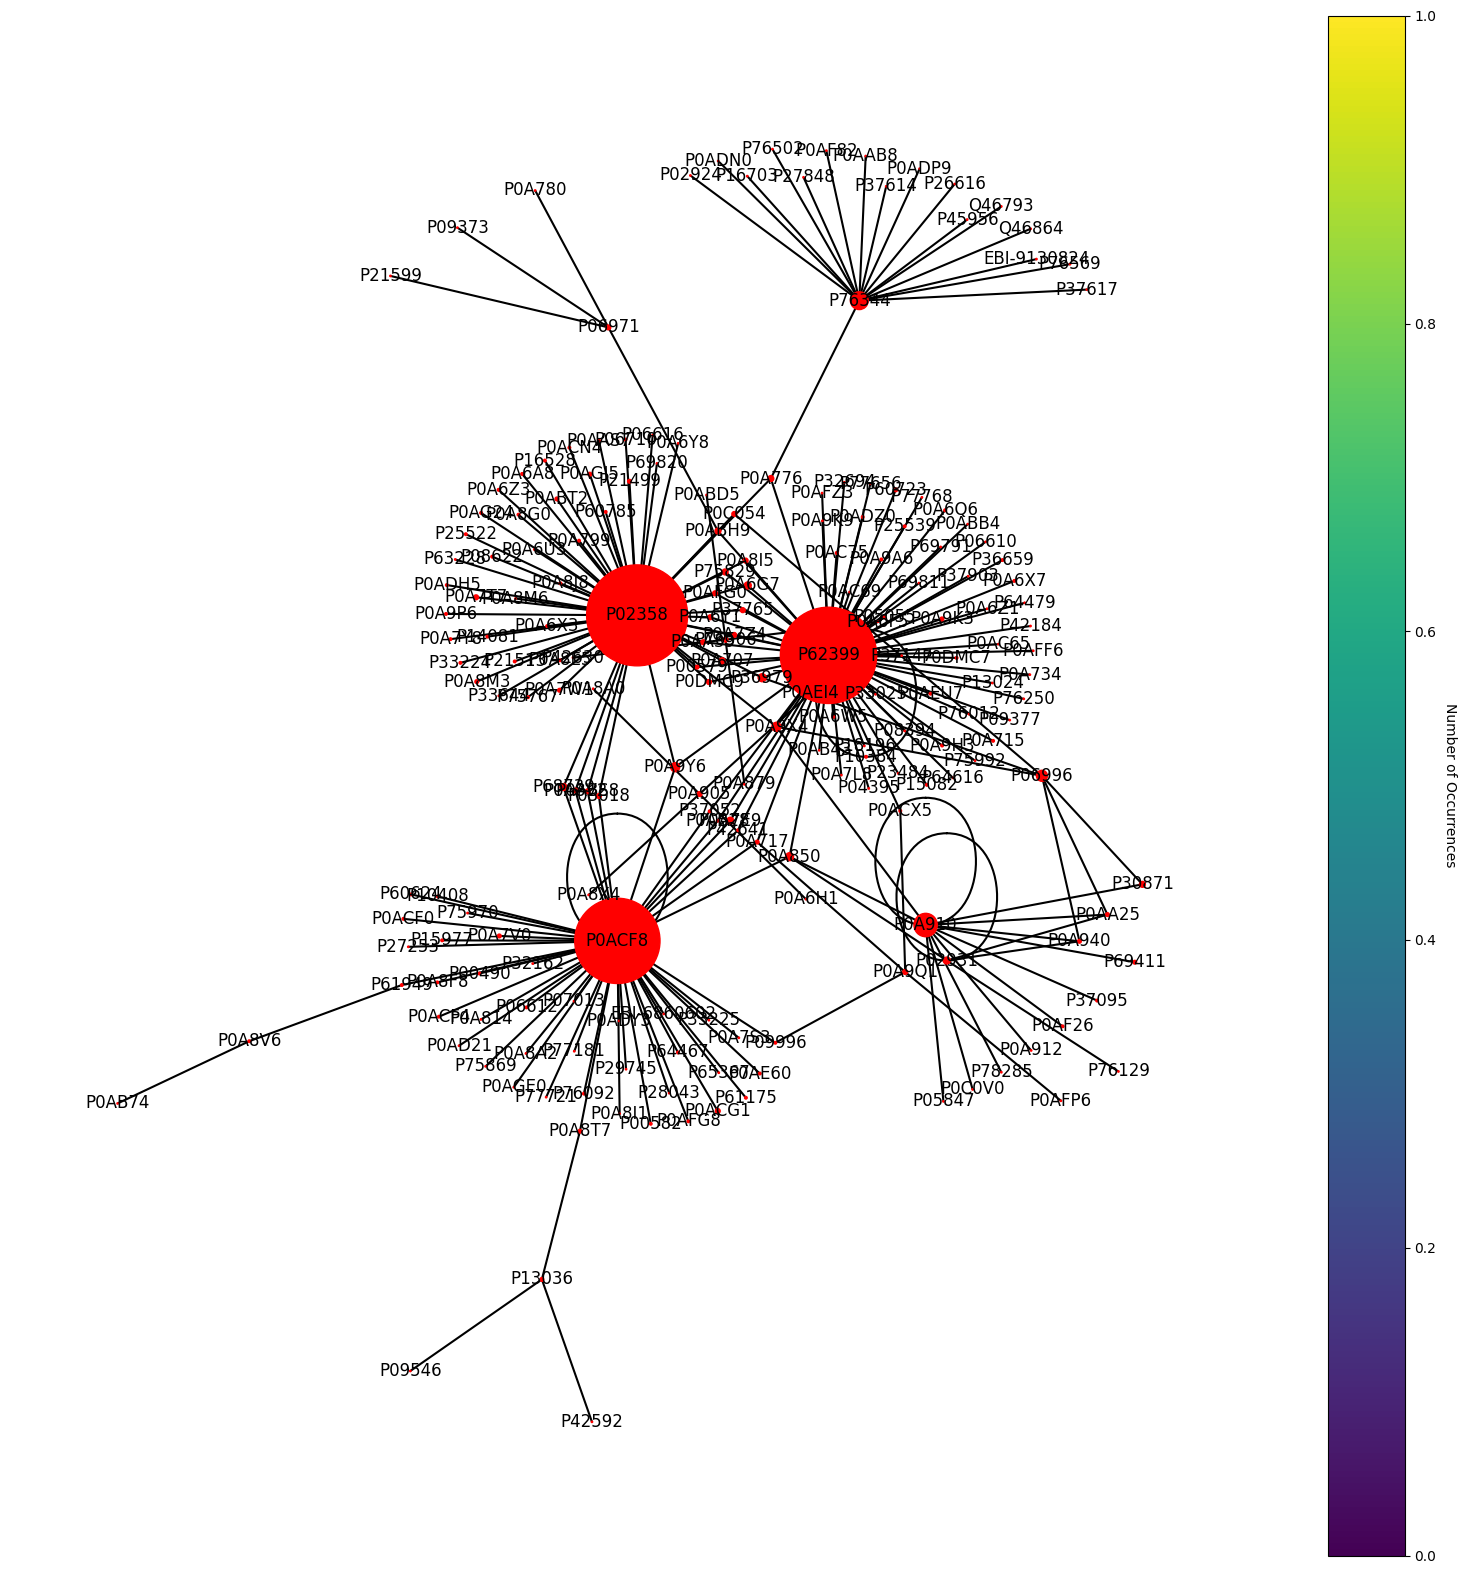

In [106]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.colors import LogNorm

int  = []
count = {}
G = nx.Graph()


norm = LogNorm()
type = {}
with open('/home/cheburek/Desktop/jupyter_serie/data/proteins.mitab', 'r') as file:
    for line in file:
       
        parts = line.strip().split('\t')
        ty = parts[11]
        
        id1 = parts[0].split(':')[1]
        id2 = parts[1].split(':')[1]
        int.append((id1,id2))
        if id1 not in type.keys():
            type[id1] = 0
        if id2 not in type.keys():
            type[id2] = 0
        if '(physical association)' in ty.split("\""):
            type[id1] = type.get(id2, 0) +1
            type[id2] = type.get(id2, 0) +1

print(type)
for i in int:
    prot1, prot2 = i
    count[prot1] = count.get(prot1, 0) + 1
    count[prot2] = count.get(prot2, 0) + 1
    G.add_edge(prot1,prot2)

fig, ax = plt.subplots(figsize=(20,20))
size = []

for s in count:
    size.append(count[s] **1.8)
node_counts = [count[node] for node in G.nodes]

pos = nx.kamada_kawai_layout(G)


nx.draw(G, pos, with_labels=True, node_color = 'red' , node_size=size, cmap = cmap,
       width=1.5)


cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.viridis), ax=ax)
cbar.set_label('Number of Occurrences', rotation=270, labelpad=15)